# Assignment is at the bottom! 

In [15]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [16]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

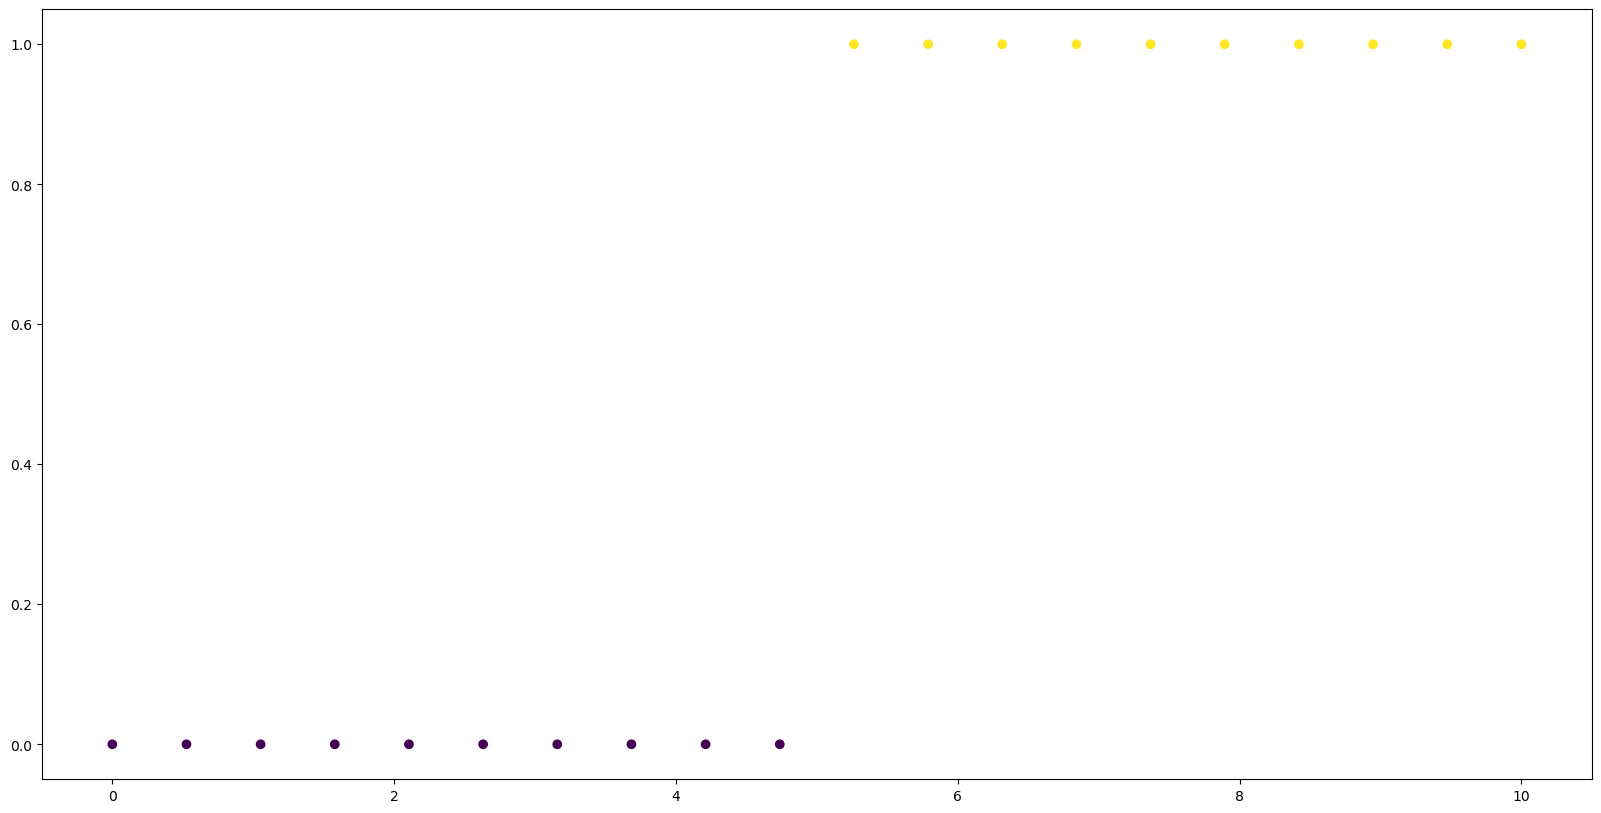

In [17]:
plt.scatter(x, y, c=y)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

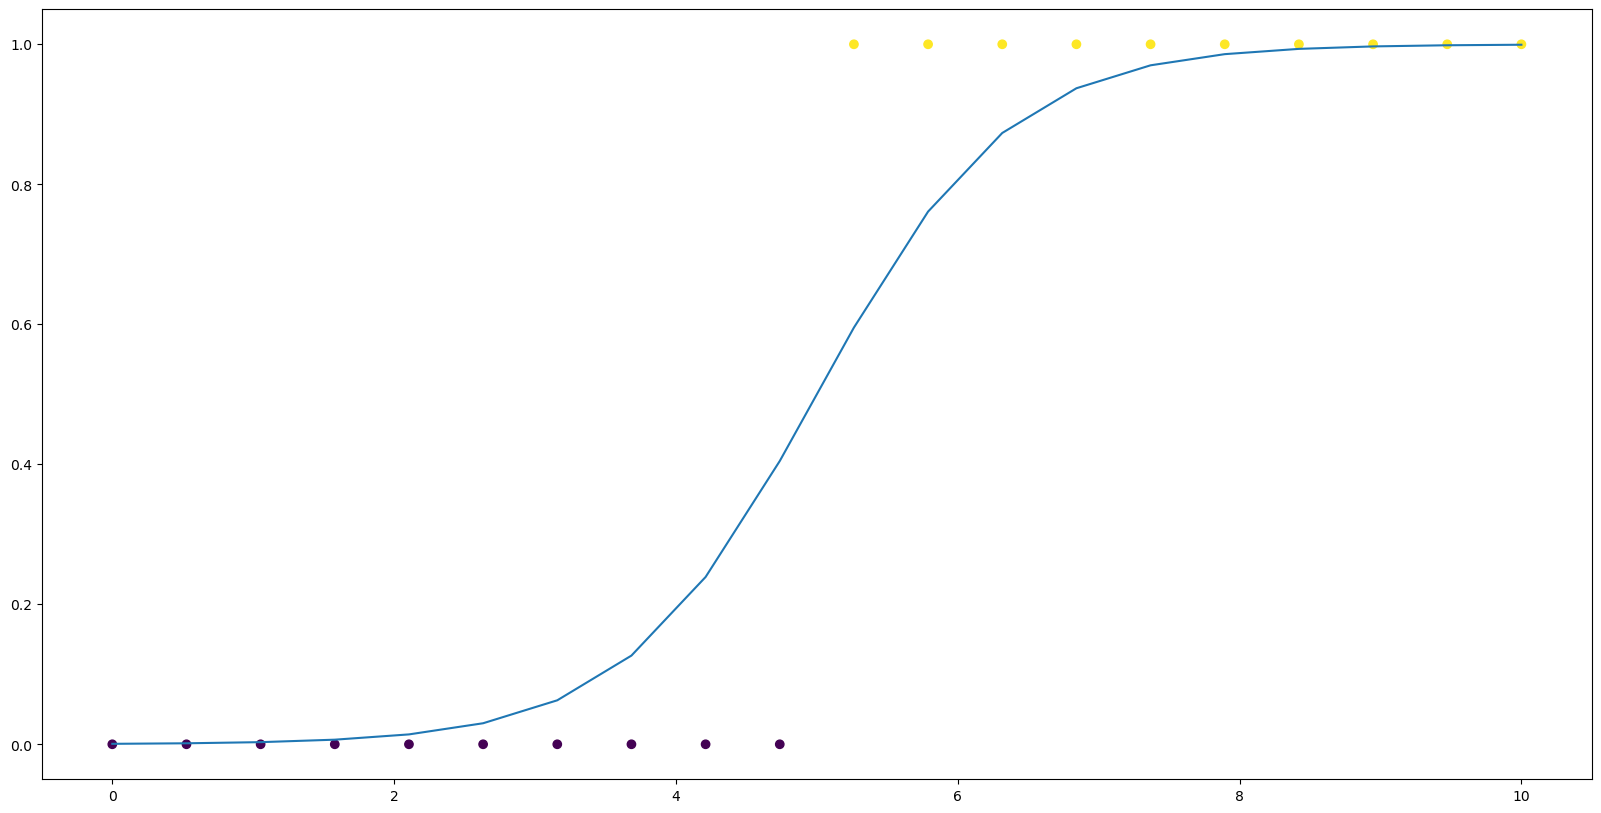

In [20]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [21]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

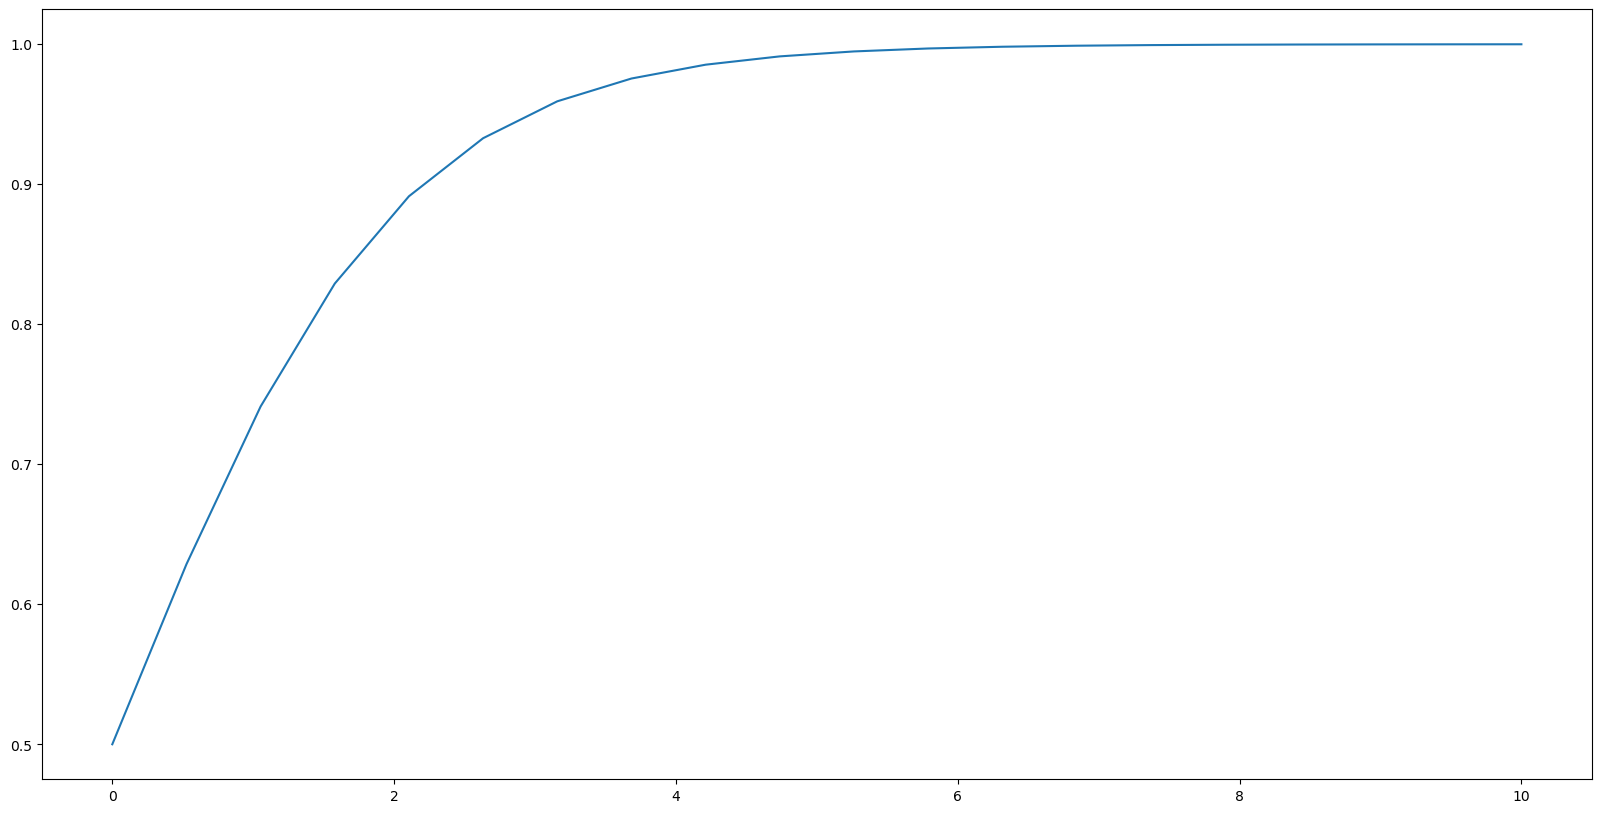

In [22]:
plt.plot(x, 1/(1+np.exp(-x)))

In [23]:
b

array([[1.46709085]])

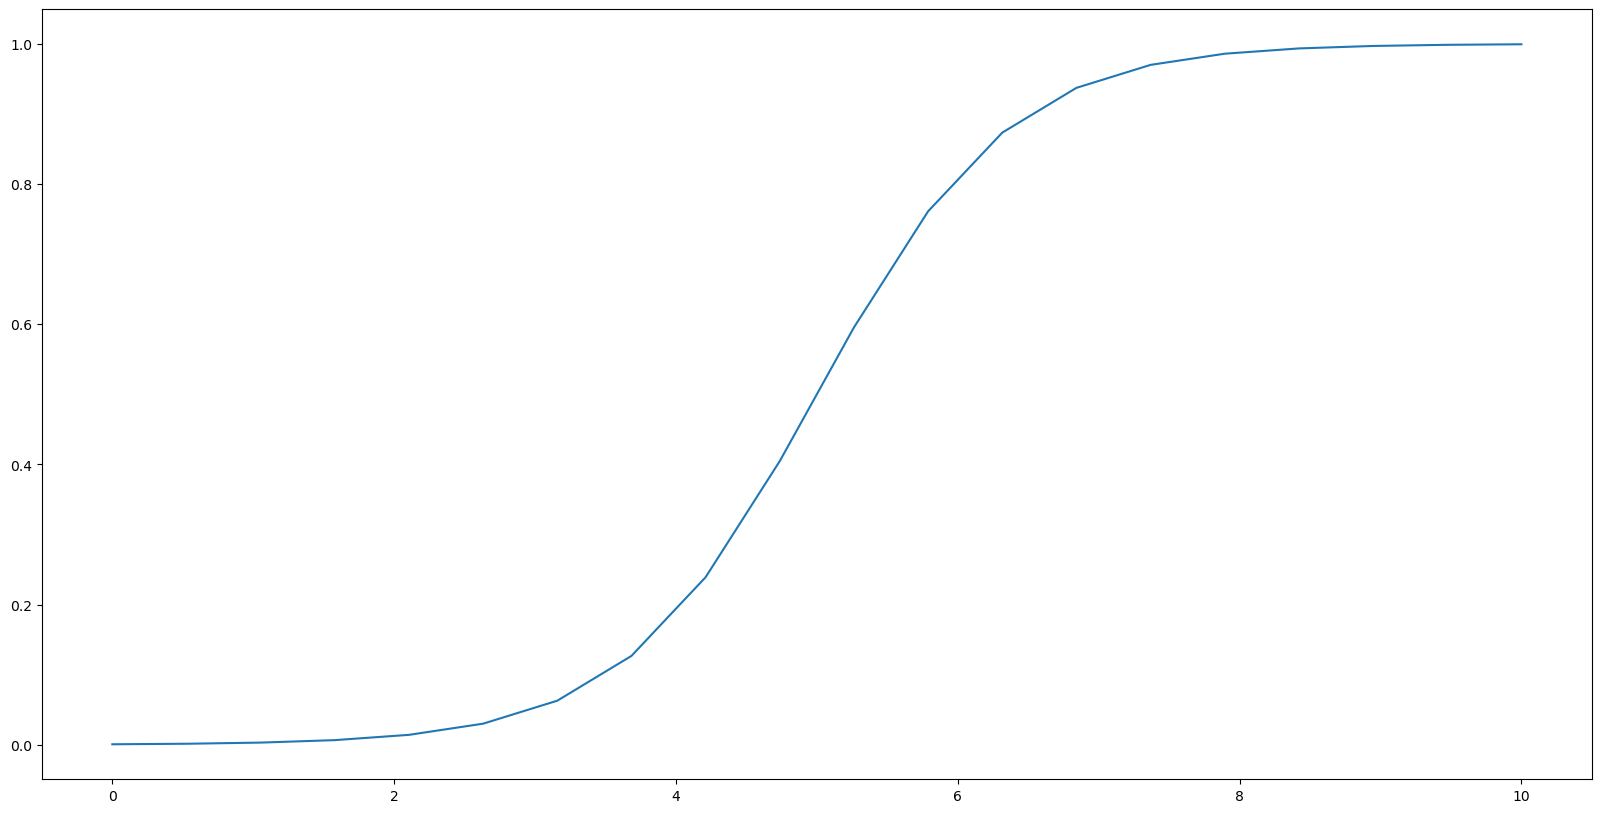

In [24]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

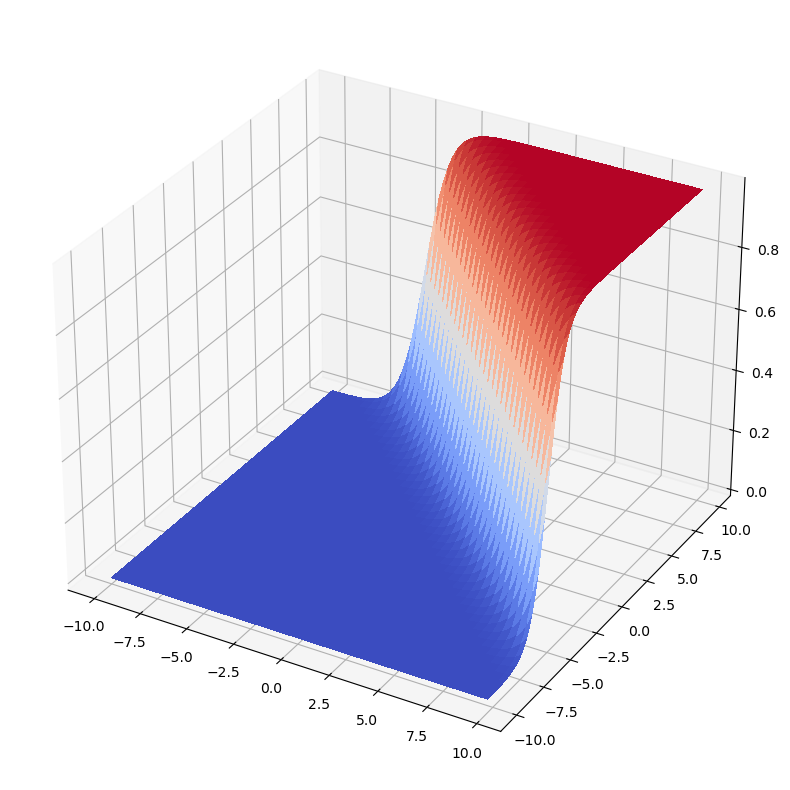

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


#Start

In [29]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [30]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [31]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

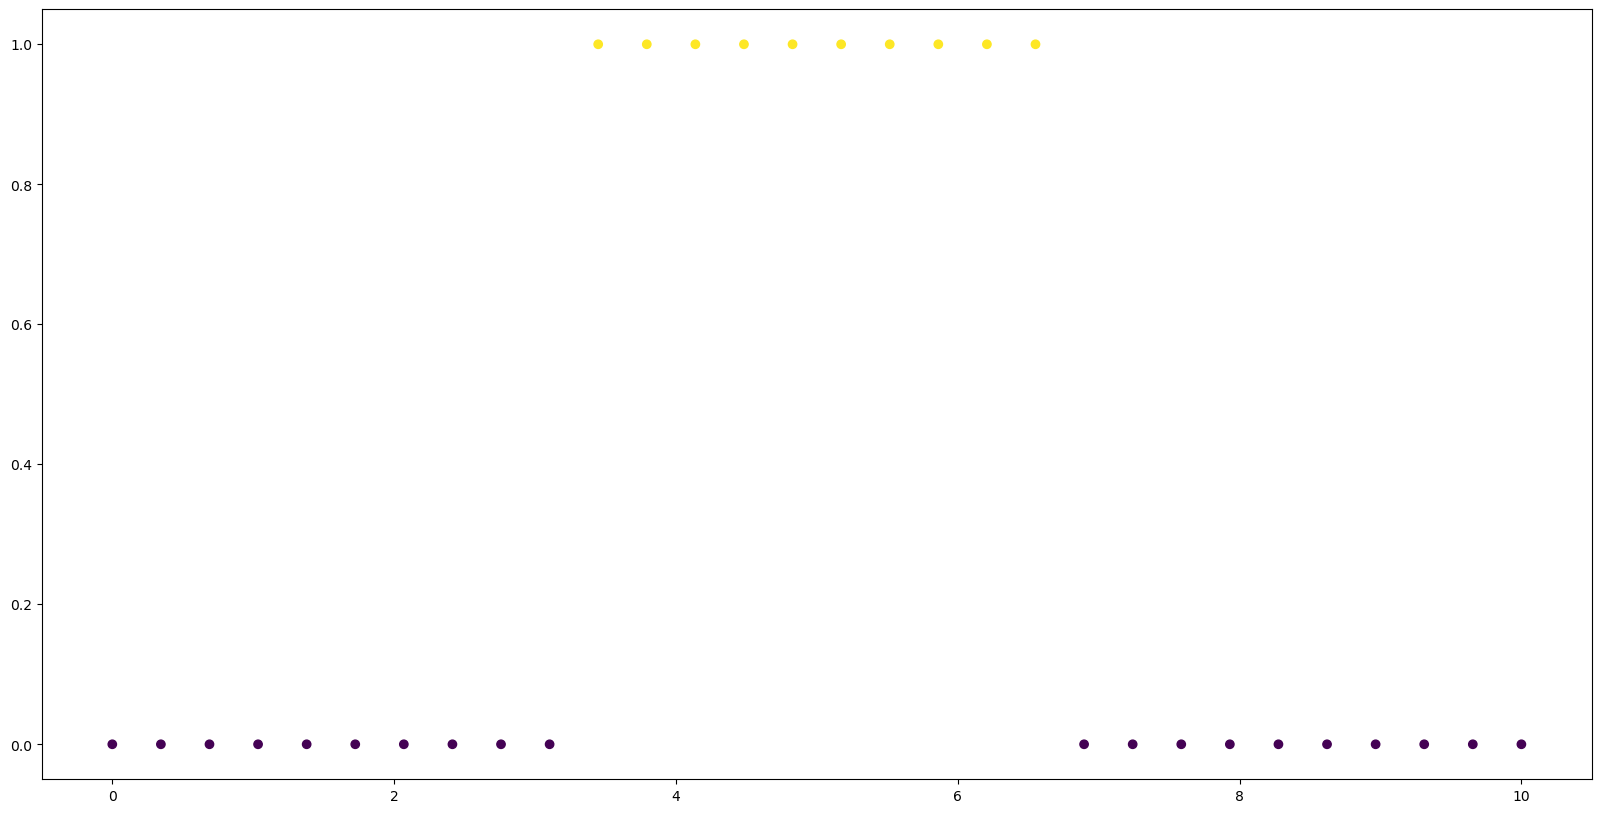

In [32]:
plt.scatter(x,y, c=y)

In [33]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

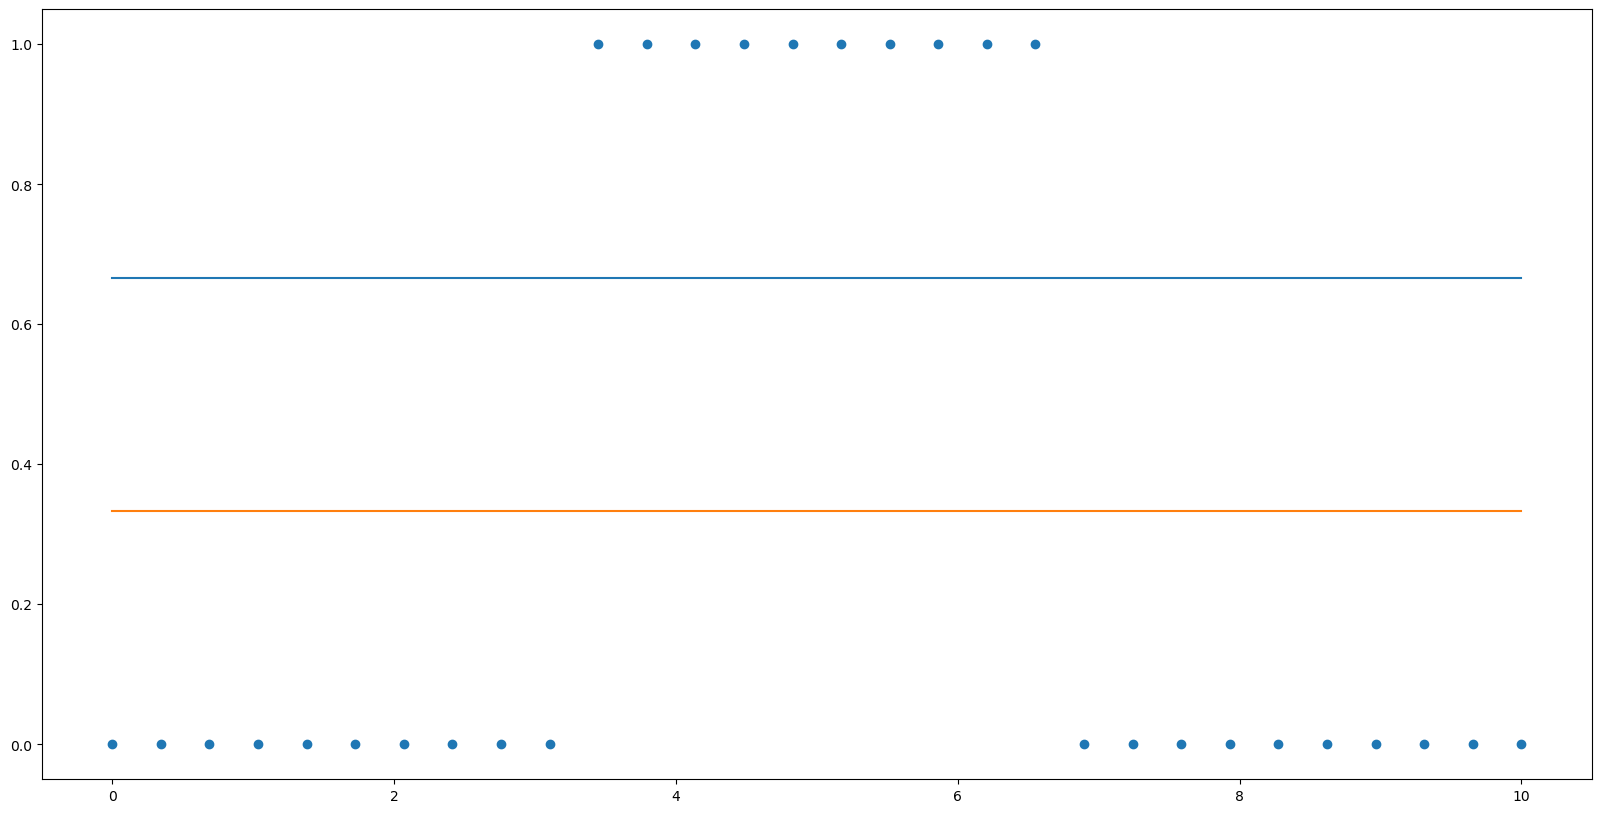

In [34]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [35]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression()

In [36]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression()

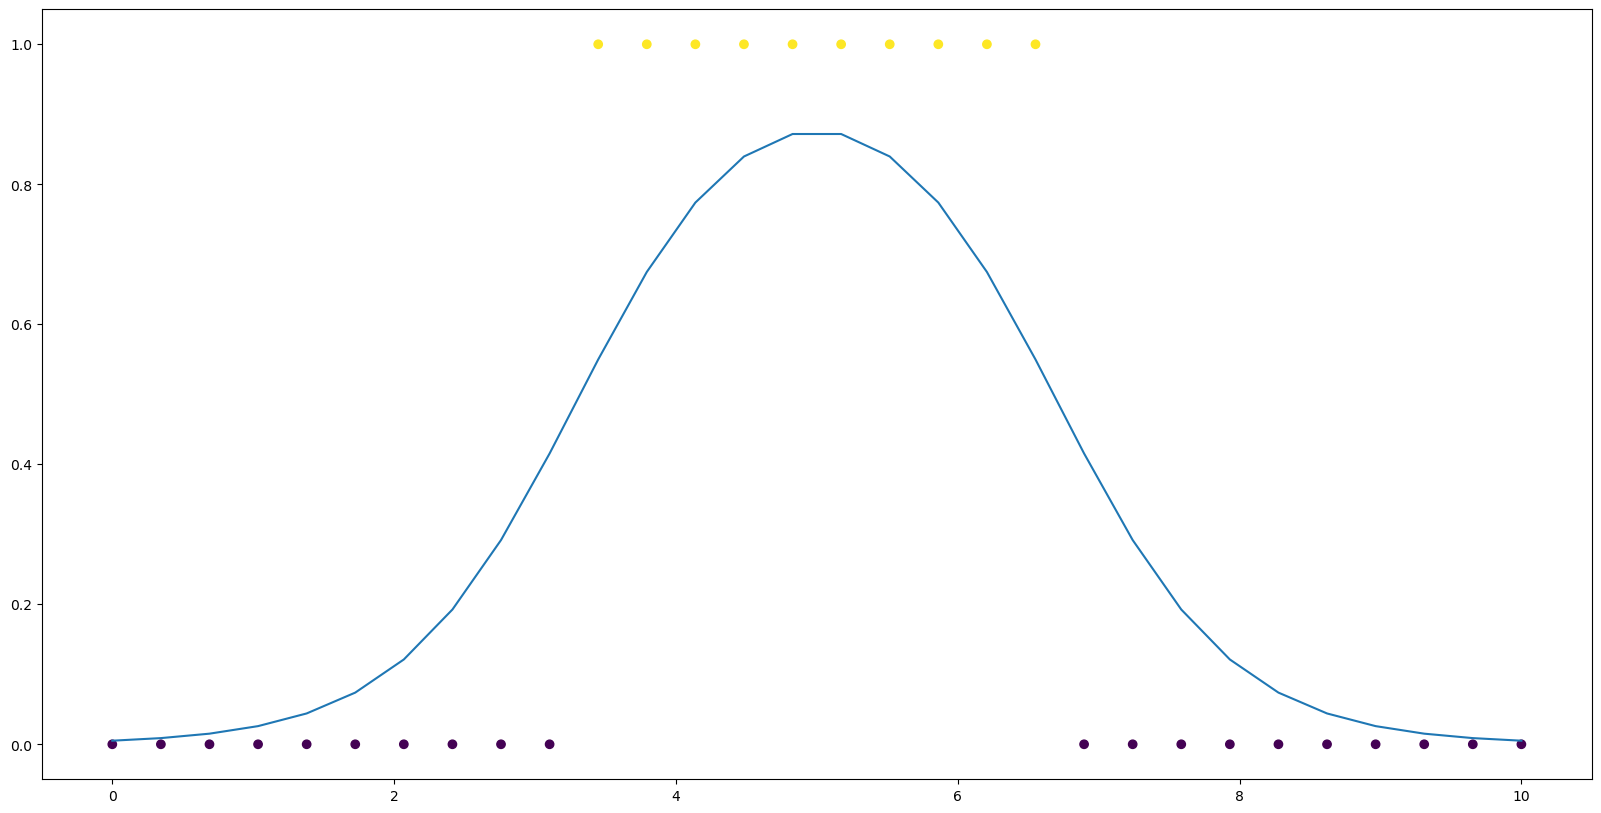

In [37]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [39]:
df = pd.read_csv('adult.data', index_col=False)
golden = pd.read_csv('adult.test', index_col=False)

In [40]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [41]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [42]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [43]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [44]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [45]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression()

In [46]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [47]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [48]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [49]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [50]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]])

In [51]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [52]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (`Heart.csv` is acceptable), create a train and a test set,  and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Explain which algorithm is optimal

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

In [126]:
# Set plot size for matplotlib figures
plt.rcParams['figure.figsize'] = (20, 10)


In [127]:
# Load data
data = pd.read_csv('Heart.csv')

In [128]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [129]:
X = data.drop('AHD', axis=1)  
y = data['AHD']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [132]:
# Initialize and fit models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)

log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [133]:
# Make predictions
y_pred_log = log_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)


print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91

Logistic Regression Confusion Matrix:
[[42  6]
 [ 8 35]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        48
           1       0.84      0.74      0.79        43

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Decision Tree Confusion Matrix:
[[42  6]
 [11 32]]


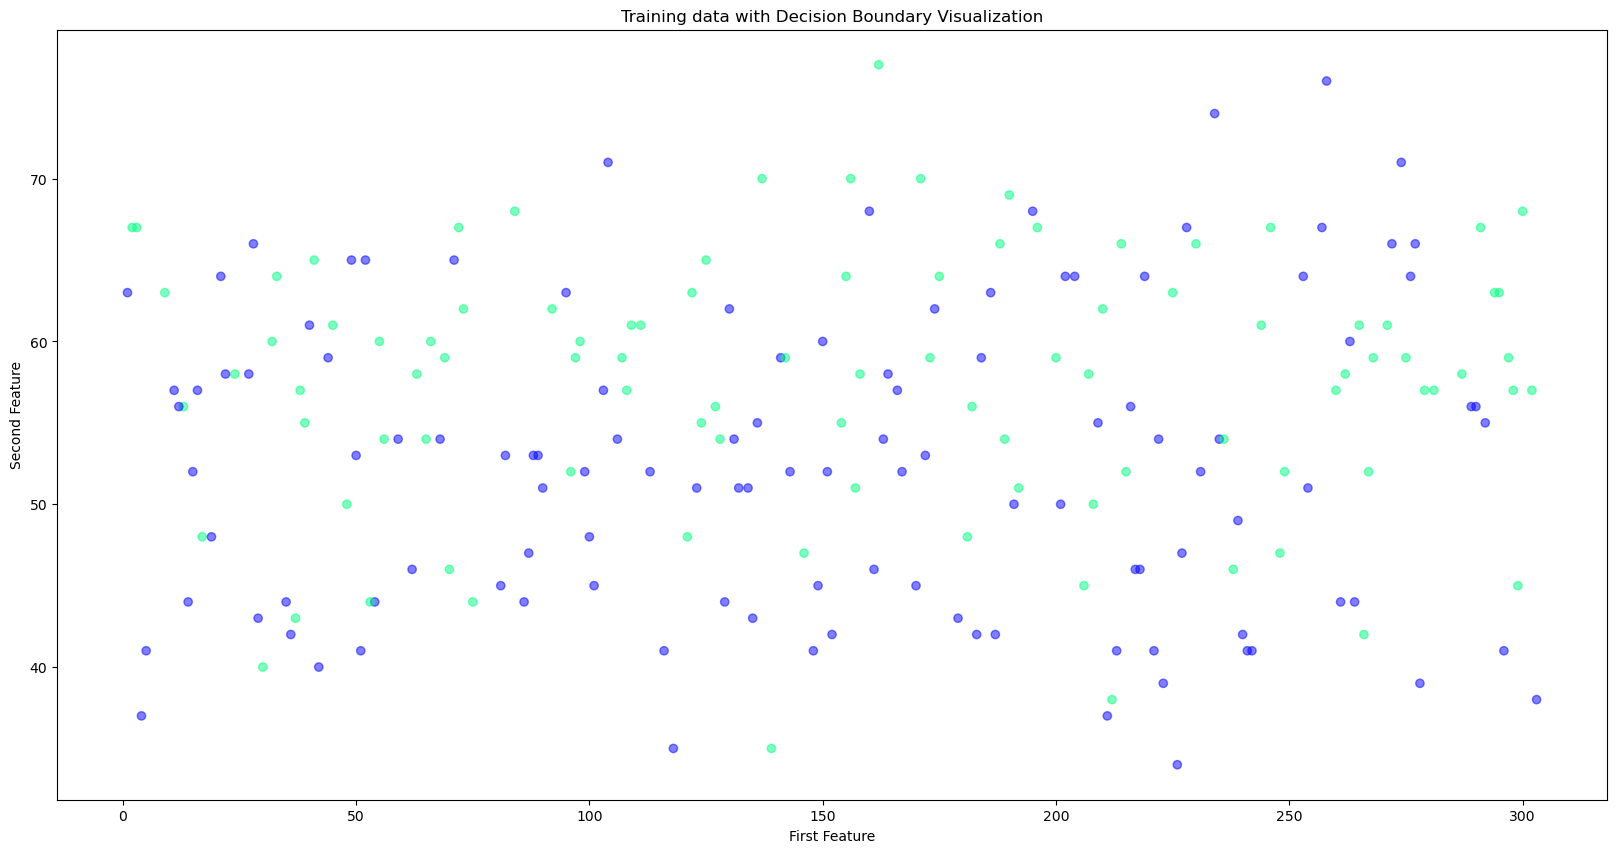

In [134]:
# visualization using DataFrame
plt.figure()
plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], c=y_train, cmap='winter', alpha=0.5)
plt.title("Training data with Decision Boundary Visualization")
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()

Text(0, 0.5, 'Feature 2')

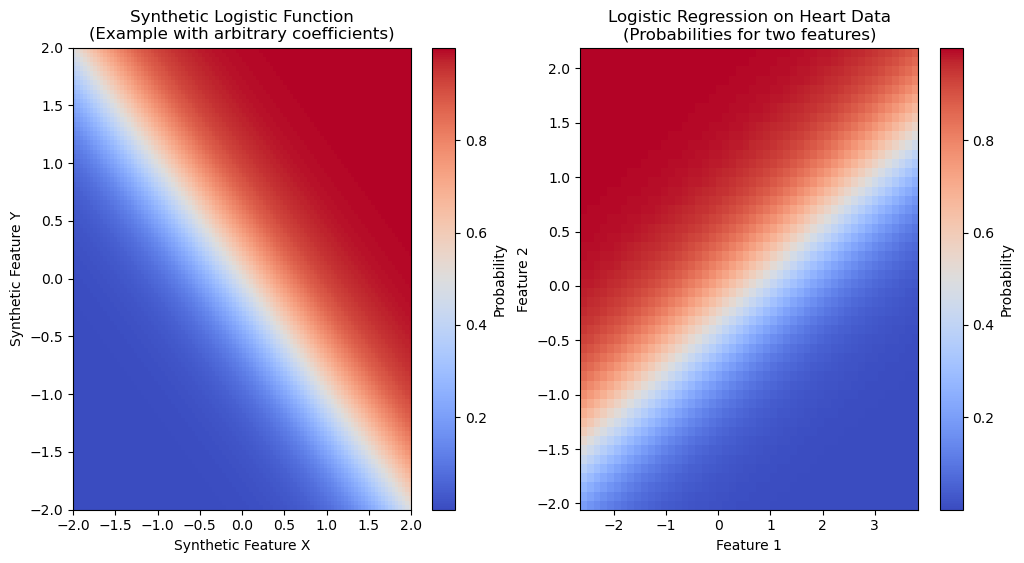

In [211]:
plt.figure(figsize=(12, 6))

# Plot for synthetic data
plt.subplot(1, 2, 1)
plt.imshow(Z, extent=(-2, 2, -2, 2), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Probability')
plt.title('Synthetic Logistic Function\n(Example with arbitrary coefficients)')
plt.xlabel('Synthetic Feature X')
plt.ylabel('Synthetic Feature Y')

Z_real = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_real = Z_real.reshape(xx.shape)

# Update the second plot to use Z_real
plt.subplot(1, 2, 2)
plt.imshow(Z_real, extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Probability')
plt.title('Logistic Regression on Heart Data\n(Probabilities for two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

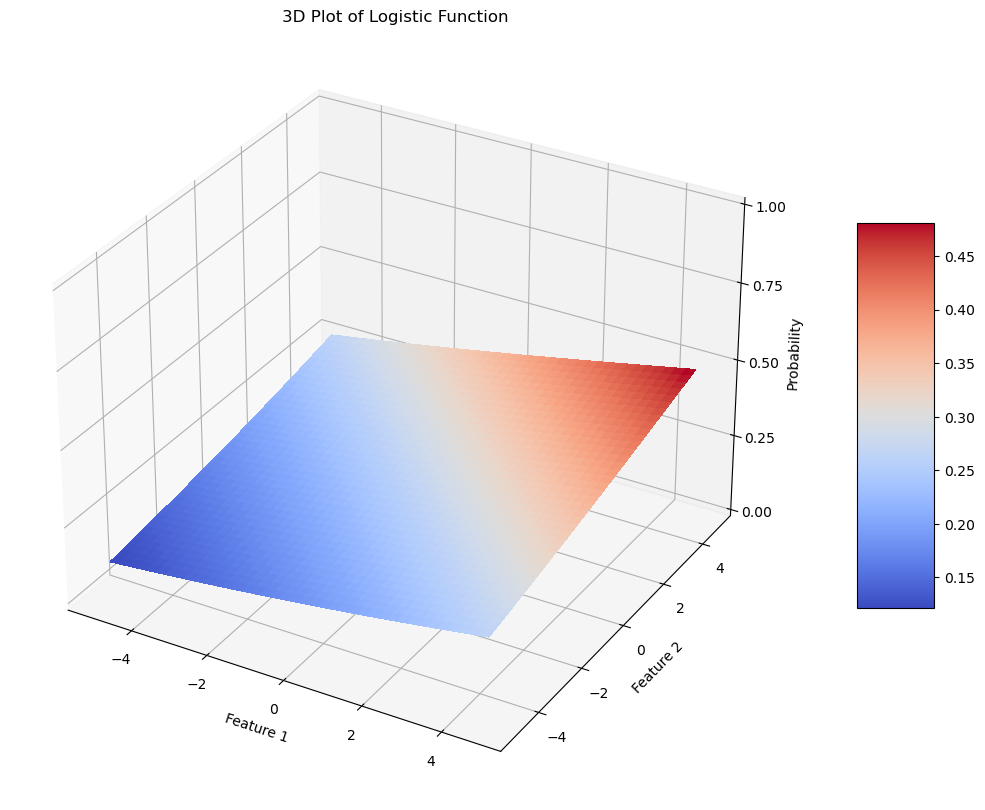

In [186]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# coefficients for the logistic regression model
b0 = 0.1  
b1 = 0.1  
b2 = -1  

#Make data
X = np.arange(-5, 5, 0.25) #indivual linear array
Y = np.arange(-5, 5, 0.25) #indivual linear array
X, Y = np.meshgrid(X, Y) 
Z = 1 / (1 + np.exp(-(b0 * X + b1 * Y + b2)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Plot of Logistic Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
ax.set_zlabel('Probability')

plt.show()

In [136]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [137]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

In [138]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

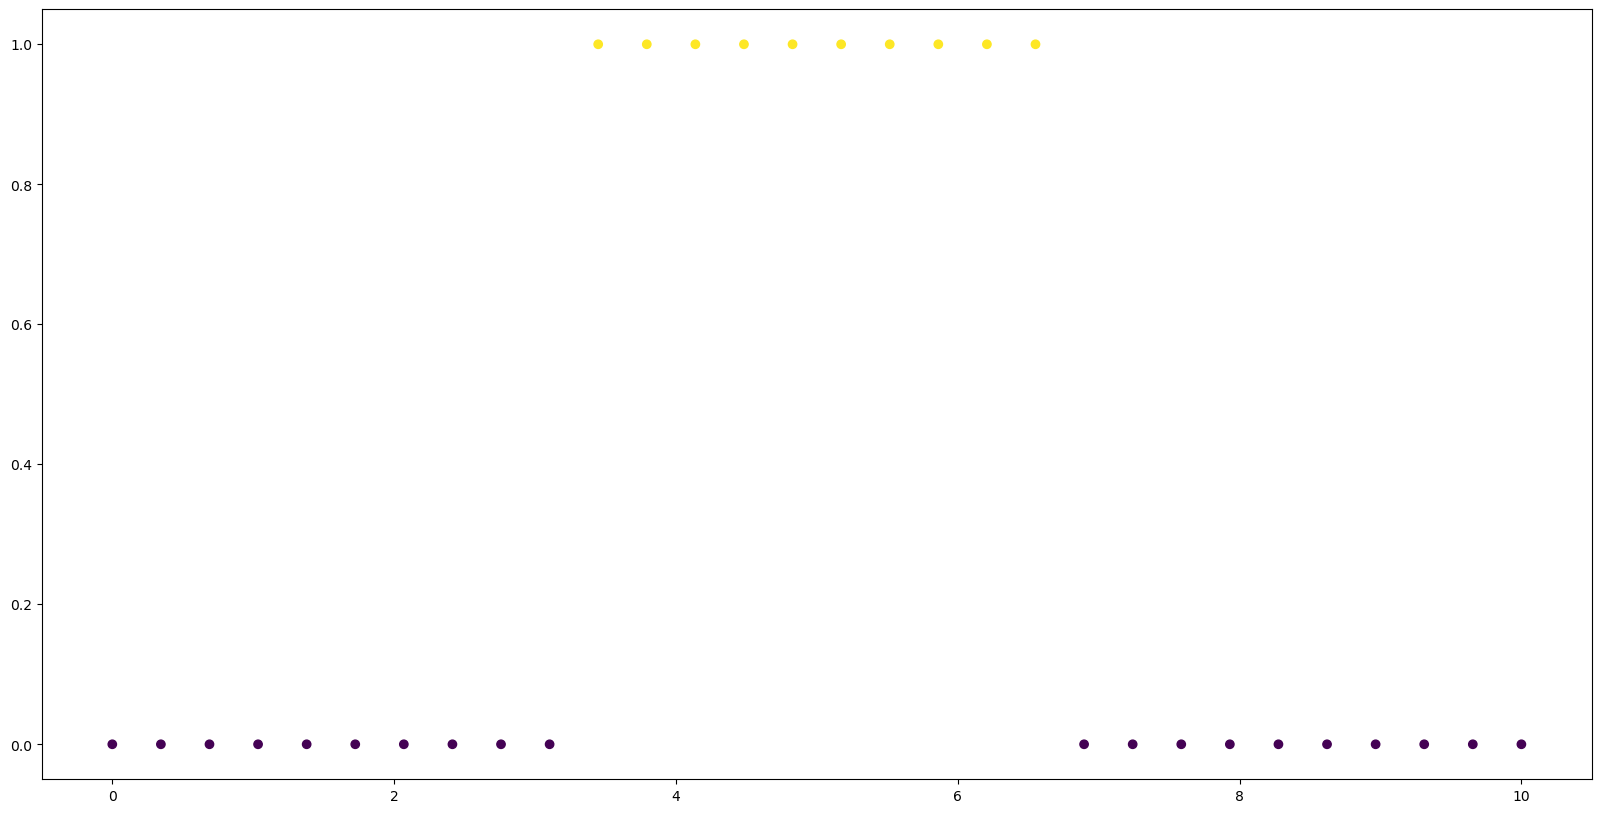

In [139]:
plt.scatter(x, y, c=y) 

In [140]:
model.fit(x.reshape(-1, 1), y)

LogisticRegression(max_iter=1000)

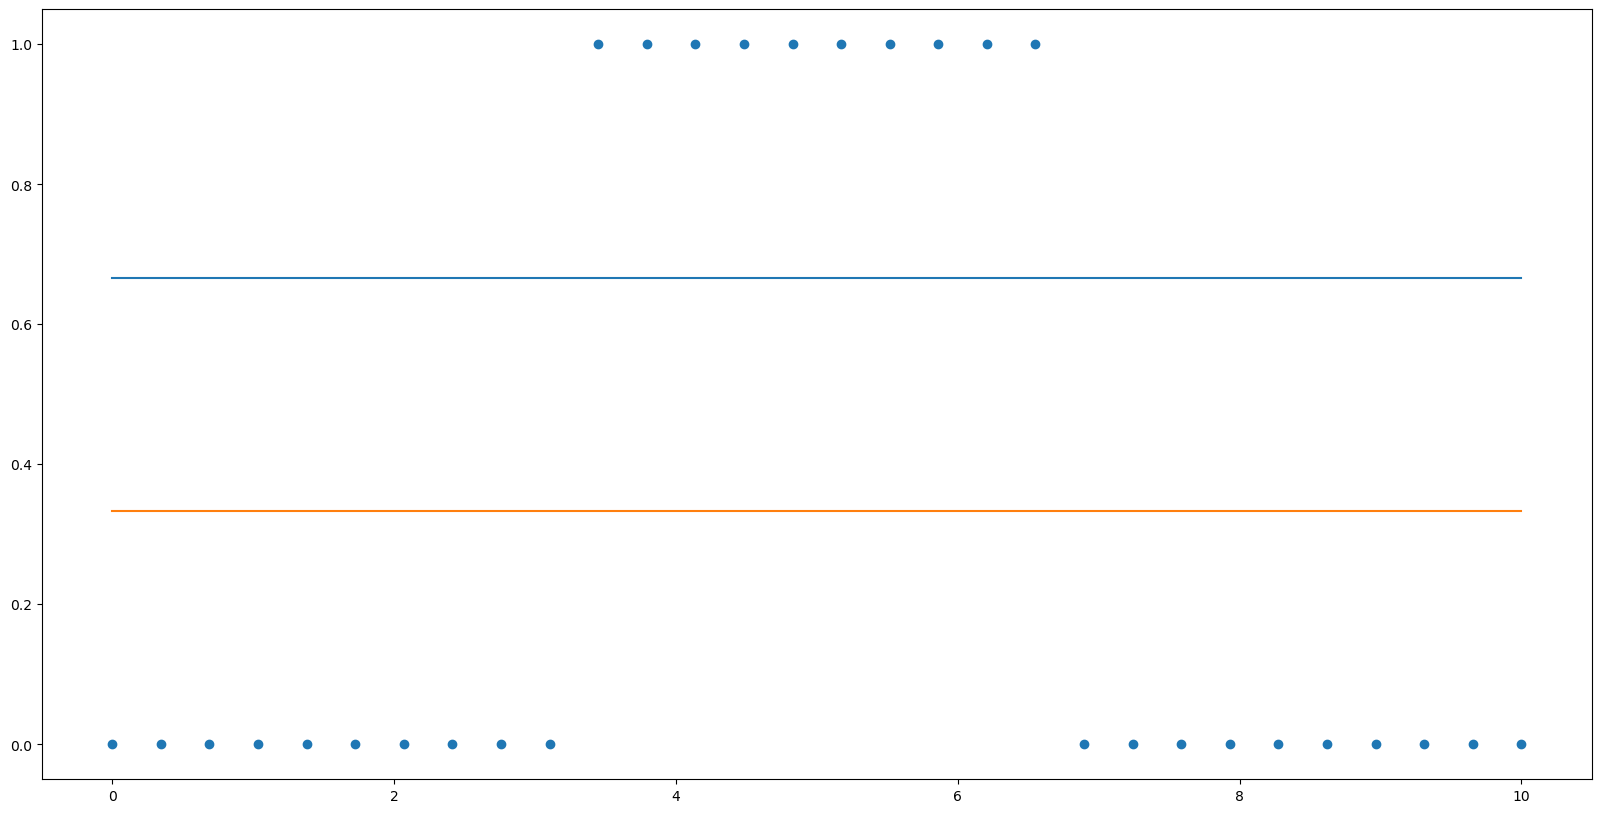

In [141]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [142]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1), y[:15])

LogisticRegression()

In [143]:
model2 = LogisticRegression()
model2.fit(x[:15].reshape(-1, 1), y[:15])

LogisticRegression()

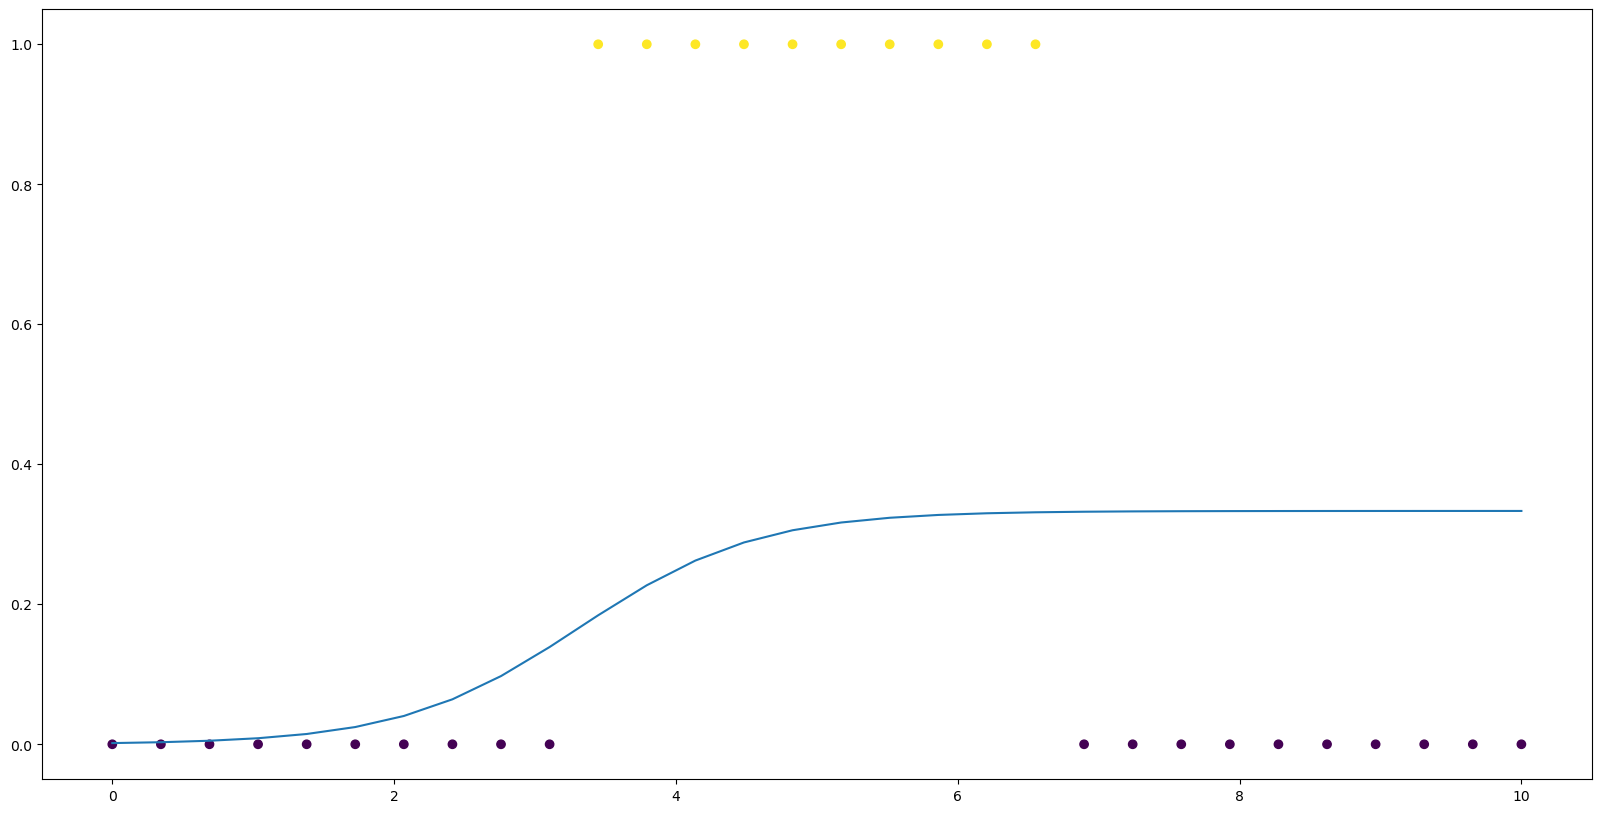

In [144]:
plt.scatter(x, y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

Based on the classification reports and confusion matrices generated from testing both the Logistic Regression and Decision Tree models on the Heart.csv dataset, it is evident that Logistic Regression significantly outperforms the Decision Tree model in several key metrics. Specifically, Logistic Regression demonstrates an overall accuracy of 85% compared to the 71% achieved by the Decision Tree model. Moreover, the precision and recall scores for Logistic Regression are consistently higher, suggesting it is more reliable for predicting both classes. This superiority likely stems from Logistic Regression's ability to handle linear relationships between features more effectively than the shallow Decision Tree's limited depth, which might underfit the data. Therefore, for this particular dataset, Logistic Regression is the optimal model, providing more accurate and stable predictions compared to the Decision Tree model.

## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain which is optimal

In [194]:
data1 = pd.read_csv('Heart.csv')

In [195]:
label_encoders = {}
for column in data1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    label_encoders[column] = le

In [196]:
X = data1.drop('AHD', axis=1)
y = data1['AHD']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [199]:
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(max_depth=12, random_state=42)

log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [200]:
DecisionTreeClassifier
DecisionTreeClassifier(max_depth=12, random_state=42)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [201]:
y_pred_log = log_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

In [202]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.84      0.86      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Logistic Regression Confusion Matrix:
[[41  7]
 [ 6 37]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        48
           1       0.70      0.65      0.67        43

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91

Decision Tree Confusion Matrix:
[[36 12]
 [15 28]]


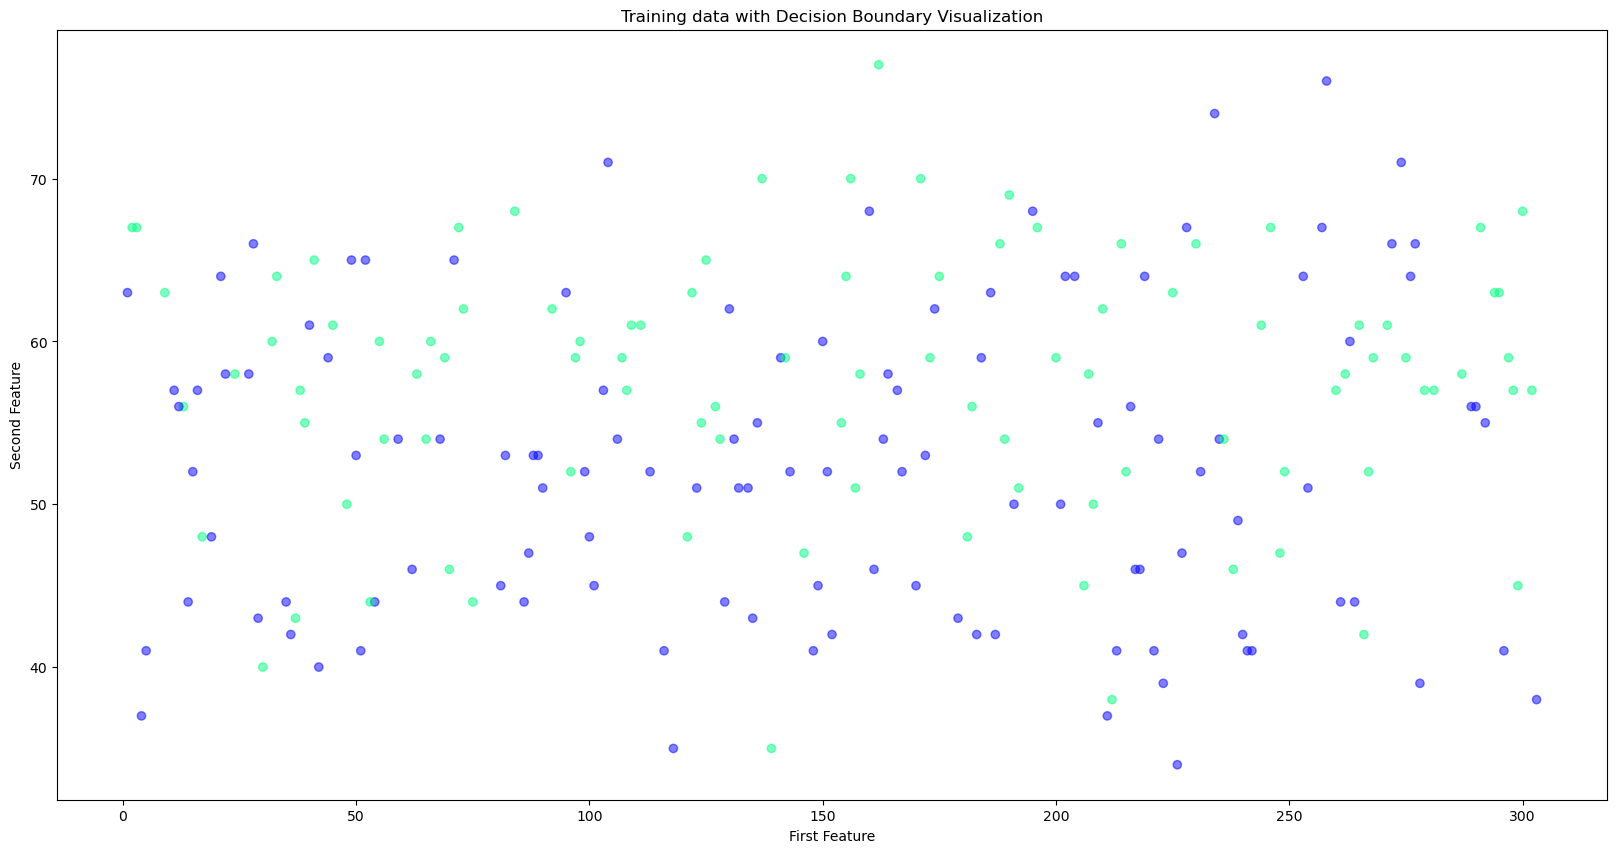

In [203]:
plt.figure()
plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], c=y_train, cmap='winter', alpha=0.5)
plt.title("Training data with Decision Boundary Visualization")
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()

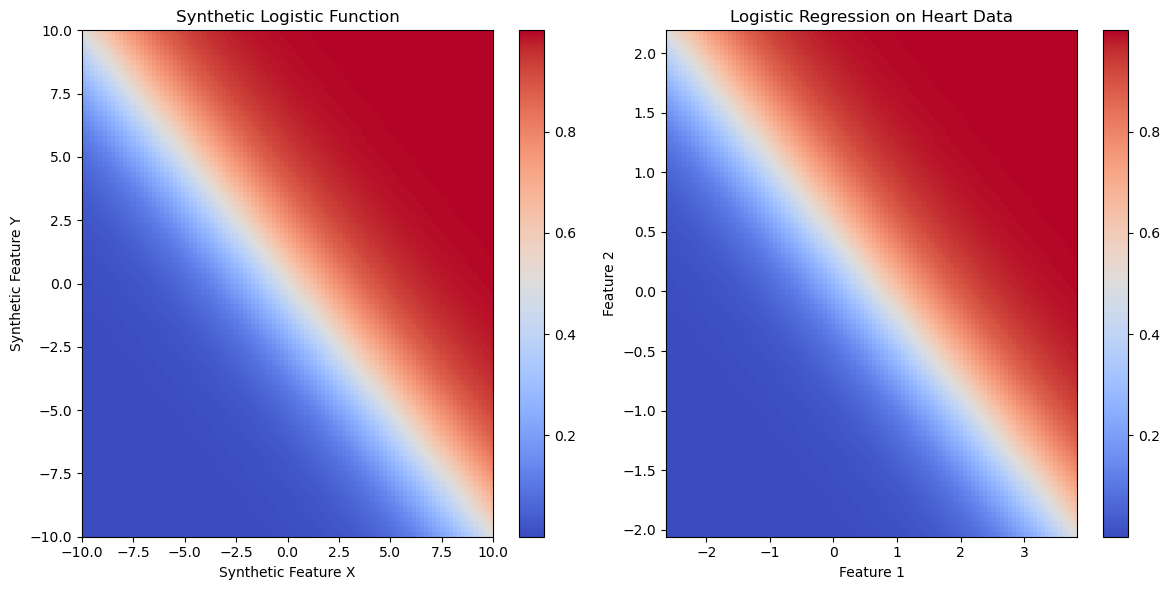

In [209]:
plt.figure(figsize=(12, 6))

# Plot for synthetic data
plt.subplot(1, 2, 1)
plt.imshow(Z, extent=(-10, 10, -10, 10), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Synthetic Logistic Function')
plt.xlabel('Synthetic Feature X')
plt.ylabel('Synthetic Feature Y')

# Plot for Heart.data model predictions
plt.subplot(1, 2, 2)
plt.imshow(Z, extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Logistic Regression on Heart Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

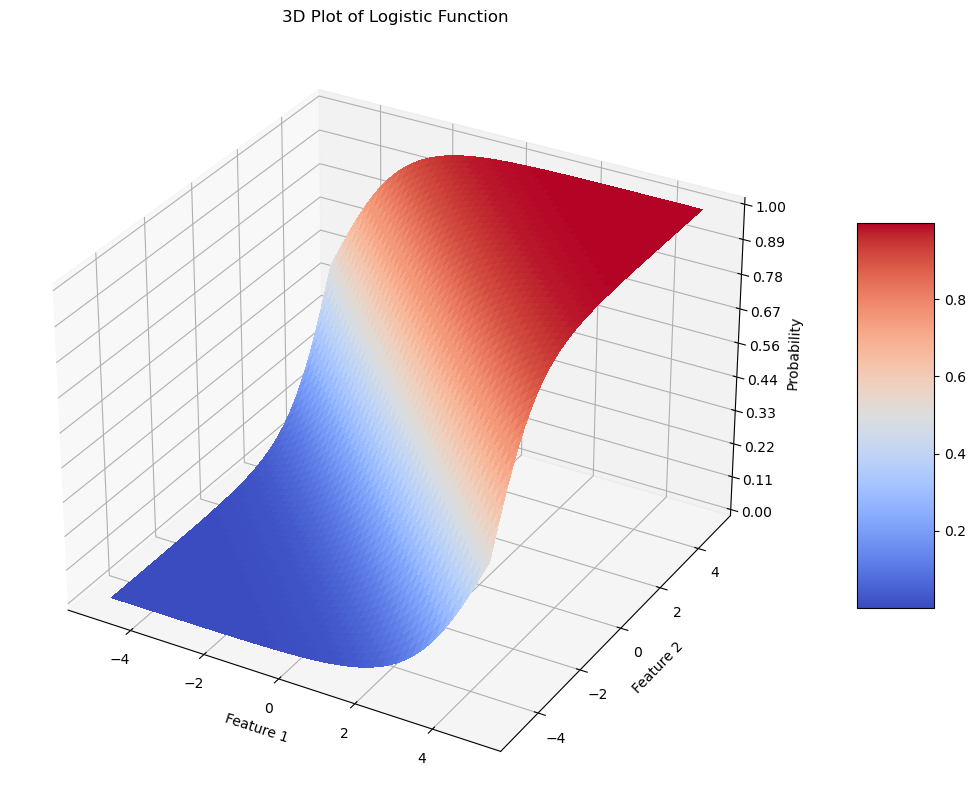

In [188]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adjusted coefficients for better visualization
b0 = 1  
b1 = 1  
b2 = 0  

# Make data
X = np.linspace(-5, 5, 100)  # Narrower range
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y) 
Z = 1 / (1 + np.exp(-(b0 * X + b1 * Y + b2)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Plot of Logistic Function')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
ax.set_zlabel('Probability')

plt.show()

The goal of this analysis is to compare the performance of Logistic Regression and Decision Tree models on the Heart.csv dataset, focusing on whether a deeper Decision Tree overfits and if Logistic Regression provides better generalization due to higher bias.

In the initial test, a shallow Decision Tree with a max depth of 2 achieved an accuracy of 81%. Its precision and recall scores indicate that while it can reasonably differentiate between classes, it is not capturing as much nuance in the data as the Logistic Regression model, which achieved an accuracy of 85%. Logistic Regression’s better performance suggests that it captures the underlying patterns without fitting too closely to the training data.

When the Decision Tree depth was increased to 12, its accuracy dropped to 70%. The deeper tree overfitted the training data, capturing noise and specific patterns that do not generalize well to new data. This overfitting results in poorer generalization and less consistent performance metrics compared to Logistic Regression, which maintained an accuracy of 86%.

The results indicate that while a deeper Decision Tree can capture more complexity, it is more prone to overfitting, leading to poor generalization. Logistic Regression, with its simpler structure, avoids overfitting and provides better generalization.

The analysis underscores the importance of choosing the right model complexity. For this dataset, Logistic Regression proves to be the optimal model, achieving a balance between bias and variance. It provides stable and accurate predictions, making it preferable for scenarios where the relationships between features and the target are relatively straightforward.

1. Model Selection: Opt for Logistic Regression when working with datasets similar to Heart.csv, where relationships between features and the target are relatively simple.
2. Complexity Management: Avoid overly complex models like deep Decision Trees that may overfit, especially with limited data.
3. Bias-Variance Trade-off: Recognize that simpler models with higher bias, such as Logistic Regression, can be more robust and reliable for generalization.
4. Future Model Adjustments: When necessary to use Decision Trees, consider techniques like pruning or limiting depth to prevent overfitting.
5. Continuous Evaluation: Regularly evaluate model performance on test data to ensure it generalizes well, and adjust model complexity accordingly.

By understanding these results, you can make informed decisions about model complexity, ensuring better generalization and more reliable predictions in practical applications.